<div align="center">

# MLOps Project

</div>

<div align="center" style="font-weight: normal;">

## <span style="color: black;">Movie Rating Predictor</span>

### Yessine Karray &nbsp;&nbsp;&nbsp; Mohamed Aymen Alimi &nbsp;&nbsp;&nbsp;&nbsp; Hedi Aloulou

</div>


In [291]:


from IPython.display import display, HTML

# Utiliser HTML pour centrer l'image
display(HTML("""
<div style="text-align: center;">
    <img src="images/mlopss.png" alt="MLOps" style="height: 400px; width: 1100px;">
</div>
"""))


# Movie Rating Predictor
## An AI-Powered Movie Rating Classification System

### Overview
Our Movie Rating Predictor is a machine learning model designed to predict movie ratings by classifying them into distinct rating categories. The model analyzes various film attributes such as genre, release year, director, cast, and other metadata to predict which rating category a movie is likely to fall into.

### Rating Categories
The model predicts one of four rating categories:

⭐ (0-4)     Poor: Films that struggle to engage viewers

⭐⭐ (4-6)    Average: Films that meet basic expectations

⭐⭐⭐ (6-8)    Good: Films that deliver solid entertainment

⭐⭐⭐⭐ (8-10)  Excellent: Outstanding films with exceptional quality

### Input Features
The model processes the following characteristics:
- Movie title
- Genre(s)
- Production year
- Runtime
- Director
- Main cast
- Content type (Movie, TV Series, etc.)
- Box office earnings (gross)
- Number of votes

### Data Preprocessing Pipeline
The preprocessing workflow combines traditional data cleaning with modern NLP approaches:
1. Basic data cleaning:
   - Text normalization
   - Missing value handling
   - Format standardization
2. Sentence Transformers processing:
   - Converting text features into embeddings
   - Creating dense vector representations
   - Capturing semantic meaning
3. Feature engineering:
   - Numerical scaling
   - Categorical encoding
   - Feature combination

This streamlined pipeline ensures efficient and meaningful processing of movie data before prediction.



### Input Data Examples 📽️

#### Expected Format
The model accepts data in JSON format with a standardized structure for each movie:

```json
{
   "movies": "The Matrix",
   "one_line": "A computer hacker learns...",
   "year": "1999-2010 Movie",
   "runtime": 136,
   "genre": "action,Family",
   "stars": "Director: Wachowski | Stars: Keanu Reeves",
   "votes": 15000,
   "gross": "463.5M"
}

# What is Data Preprocessing ?

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

# Data Preprocessing Importance :

When using data sets to train machine learning models, you'll often hear the phrase **"garbage in, garbage out"** This means that if you use bad or "dirty" data to train your model, you’ll end up with a bad, improperly trained model that won’t actually be relevant to your analysis.

Good, preprocessed data is even more important than the most powerful algorithms, to the point that machine learning models trained with bad data could actually be harmful to the analysis you're trying to do – giving you "garbage" results.

# Data pre-processing steps

In [290]:
import pandas as pd
df = pd.read_csv("C:/Users/MSI/Desktop/movies.csv")
df_secours=df
df_secours2=df
df.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Data preprocessing steps :

# Step 1 : Data Quality Assesement

## **Check the data types of the columns** :

In [291]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


(9999, 9)

## **Check if there is any duplicated values** :

In [292]:
print("Nombre de lignes avant:", len(df))
df = df.drop_duplicates()
print("Nombre de lignes après:", len(df))
df = df.reset_index(drop=True)
print("Vérification finale pour les doublons:", df.duplicated().sum())

Nombre de lignes avant: 9999
Nombre de lignes après: 9568
Vérification finale pour les doublons: 0


# **Text Cleaning**
Our text cleaning pipeline preserves letters (a-z, A-Z), numbers (0-9), spaces, commas and periods, while replacing any other special characters with a space and removing multiple spaces. This process is applied directly to DataFrame text columns while preserving numerical values.

In [293]:
def clean_text(text):
   if pd.isna(text):
       return text
   # Conversion en string
   text = str(text)
   # Remplacer les caractères spéciaux par des espaces
   import re
   text = re.sub(r'[^a-zA-Z0-9\s,.]', ' ', text)
   # Supprimer les espaces multiples
   text = ' '.join(text.split())
   return text

In [294]:
for col in df.columns:
   if df[col].dtype == 'object':  # Seulement pour colonnes texte
       df[col] = df[col].apply(clean_text)

# **Lowering columns names**

In [295]:
def clean_column_names(df):
    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()
    return df

In [296]:
df= clean_column_names(df)
print(df.columns)

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


In [297]:
df.head(3)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,NaN
1,Masters of the Universe Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,The Walking Dead,2010 2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN


# **Data Analysis Overview**


## Missing Values Analysis

In [298]:
print("Missing Values Count:")
print(df[['movies', 'one-line', 'year', 'runtime', 'genre', 'stars', 'votes', 'gross']].isnull().sum())

Missing Values Count:
movies         0
one-line       0
year         542
runtime     2560
genre         78
stars          0
votes       1400
gross       9108
dtype: int64


## Word Embedding Methods 

* Sentence Transformers

Sentence Transformers are deep learning models based on transformer architectures (like BERT, RoBERTa, etc.) that convert sentences into dense vector representations while preserving semantic meaning. These models understand context and relationships between words, making them powerful for various NLP tasks.
<div style="text-align: center;">
    <img src="images/logo.png" alt="MLOps" style="height: 400px; width: 1100px;">
</div>

* TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency):
TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents. It combines two components:

TF (Term Frequency): How often a word appears in a document
IDF (Inverse Document Frequency): How rare or common the word is across all documents
<div style="text-align: center;">
    <img src="images/logo2.webp" alt="MLOps" style="height: 400px; width: 1100px;">
</div>

# **Movies Preprocessing + Encoding**


 + <h5>Sentence Transformers<h5>

In [299]:
def create_movie_embeddings(df):
  from sentence_transformers import SentenceTransformer
  import pandas as pd
  import numpy as np  
  try:          
      # Initialize model
      model = SentenceTransformer('all-MiniLM-L6-v2')
      
      # Create embeddings
      df['movies'] = model.encode(df['movies'].tolist(), show_progress_bar=True).tolist()
      
      # Convert string embeddings to numpy arrays if needed
      if isinstance(df['movies'].iloc[0], str):
          df['movies'] = df['movies'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
      
      return df
      
  except Exception as e:
      print(f"An error occurred in movie embedding: {str(e)}")
      return None

In [300]:
df=create_movie_embeddings(df)

Batches:   0%|          | 0/299 [00:00<?, ?it/s]

In [301]:
df.head(3)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,NaN
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,NaN
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,NaN


In [302]:
secour=df.copy

# **Genre Preprocessing + Encoding**

+ Standardization and analysis of genre combinations  " Replace null values directly with "Unspecified" "



In [303]:
def standardize_movie_genres(df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Remplacer les NaN dans la colonne 'genre' par 'unspecified'
    df['genre'] = df['genre'].fillna('unspecified')
    def normalize_genre(genre_string):
        if pd.isna(genre_string):
            return "unspecified"
        # Convertir en minuscules et nettoyer les espaces
        genre_string = str(genre_string).lower().strip()
        # Séparer les genres individuels par la virgule et enlever les espaces superflus
        genres = [g.strip() for g in genre_string.split(',')]
        # Supprimer les doublons et trier les genres
        genres = sorted(set(genres))
        return ','.join(genres) if genres else "unspecified"
    # Appliquer la standardisation directement sur la colonne 'genre'
    df['genre'] = df['genre'].apply(normalize_genre)
    return df

In [304]:
df=standardize_movie_genres(df)

In [305]:
def visualize_genre_statistics(df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("\n=== STATISTIQUES DES GENRES UNIQUES ===")
    # Récupérer la fréquence de chaque genre unique après séparation
    genre_stats = df['genre'].str.split(',').explode().str.strip().value_counts()
    print("\nGenres uniques avec leur fréquence d'apparition:")
    print(genre_stats)
    # Visualisation des genres uniques les plus fréquents
    plt.figure(figsize=(15, 8))
    sns.barplot(x=genre_stats.values, y=genre_stats.index)
    plt.title('Fréquence des Genres Uniques')
    plt.xlabel('Nombre de Films')
    plt.ylabel('Genres')
    plt.tight_layout()
    plt.show()


=== STATISTIQUES DES GENRES UNIQUES ===

Genres uniques avec leur fréquence d'apparition:
genre
drama          4115
comedy         2736
action         2110
adventure      1588
animation      1584
crime          1519
documentary    1221
thriller        895
mystery         840
romance         835
fantasy         537
horror          518
family          442
reality tv      370
history         346
biography       311
sci fi          303
short           247
music           200
sport           192
game show        98
talk show        89
unspecified      78
musical          61
war              48
western          24
news             23
film noir        12
Name: count, dtype: int64


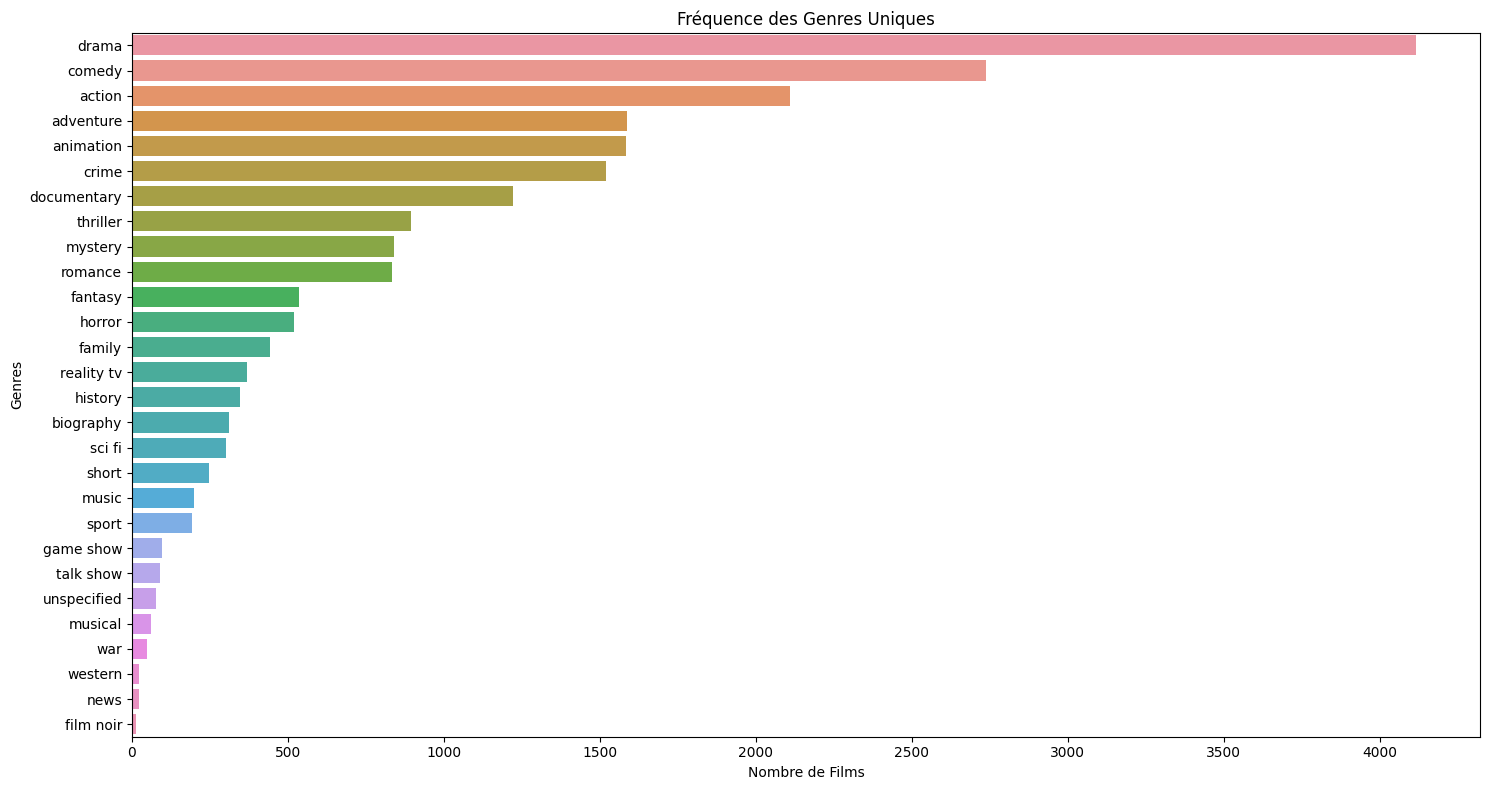

In [306]:
visualize_genre_statistics(df)

# **Gross Preprocessing + Encoding**

+ Standardization and analysis of Gross " Replace null values directly with Median "


In [307]:
def process_gross(df):
   try:
       # Clean gross column - remove 'M' and convert to float
       df['gross'] = df['gross'].str.replace('M', '').astype(float)
       # Calculate median and fill null values
       median_gross = df['gross'].median()
       df['gross'] = df['gross'].fillna(median_gross)
       return df
   except Exception as e:
       print(f"An error occurred: {str(e)}")
       return None

In [308]:
df=process_gross(df)
df.head(5)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",6.1,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,6.145
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",5.0,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,6.145
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,6.145
3,"[-0.12033625692129135, -0.02028549462556839, -...",2013,"adventure,animation,comedy",9.2,An animated series that follows the exploits o...,"Stars Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,6.145
4,"[-0.16527359187602997, 0.007843196392059326, -...",2021,"action,crime,horror",NaN,"A prequel, set before the events of Army of th...",Director Matthias Schweigh fer Stars Matthias ...,NaN,NaN,6.145


# **Rating Column + Categorization (OUR Label)**

**Median Method**

In [309]:
def process_rating(df):
   try:
       # Fill missing values with median
       median_rating = df['rating'].median()
       df['rating'] = df['rating'].fillna(median_rating)
       
       # Convert ratings directly to categories
       df['rating'] = pd.cut(df['rating'], 
                           bins=[0, 4, 6, 8, 10], 
                           labels=[0, 1, 2, 3],
                           include_lowest=True)
       return df
   except Exception as e:
       print(f"An error occurred: {str(e)}")
       return None

In [310]:
df = process_rating(df)

# **Year cleaning**

**Year preprocessing  with uploading new column for movie type extracted from column year and converting year into year year_start year_end column**

In [311]:
df['year'].unique()

array(['2021', '2010 2022', '2013', '2020', '2006 2013', '2019',
       '2016 2021', '2011', '2005', '2008 2013', '2017', '2017 2021',
       '2016', '1994 2004', '2014', '2013 2020', '2015', '2005 2020',
       '2013 2022', '2003', '2009 2020', 'I 2018', '2010 2015',
       '2011 2019', '2015 2020', '2005 2014', '2009 2015', '2008 2014',
       '2016 2018', '2009 2017', '2018 2021', '2017 2020', '1987 1994',
       '2018', '2012', '2014 2020', '2011 2018', '2005 2017', '2007 2015',
       '2000 2007', 'II 2007', '1993', '1999 2022', '2015 2018',
       '2014 2019', '2012 2020', '2013 2019', '2007 2012', '2011 2020',
       '2010 2017', '2000 2015', '2015 2021', '2001', '1997', '2011 2017',
       '1993 1999', '1989 1998', '2010 2013', '2010 2020', '2003 2019',
       'I 2019', '2017 2019', '1975', '2005 2008', '1995 2001', '2006',
       '2015 2017', '2008 2020', '1984 1996', '2010', '2000', '2013 2018',
       '2009 2016', '2016 2020', '2021 TV Special', '1998 2003', 'I 2017',
      

**Remarque Importante** : Important Note: we notice in the year field different content types, so we will extract them and put them in a new column called content_type
There are 5 content types:
Movie
TV Special
TV Movie
Video
TV Short
Video Game
Otherwise, Unknown is the 6th type

Our Traitement
+ Extracts Years:
  + Single Year -> "2021" -> start_year=2021, end_year=2021
  + Year Range -> "2010-2022" -> start_year=2010, end_year=2022
  + Ongoing Series -> "2020-" -> start_year=2020, end_year=2024
  + Years with Space -> "2010 2022" -> start_year=2010, end_year=2022
  + Roman Numerals -> "I (2021)" -> start_year=2021, end_year=2021

+ Identifies Content Types:
  + "TV Special" in text -> TV Special
  + "TV Movie" in text -> TV Movie
  + "TV Short" in text -> TV Short
  + "Video Game" in text -> Video Game
  + Missing -> Unspecified

+ Handles Missing Values:
  + Calculates median years for both start and end
  + Fills missing years with these median values
  + Converts invalid/missing content types to "Unspecified"

The result is three new columns:
+ year_start: Starting year with no missing values
+ year_end: Ending year with no missing values
+ content_type: Content classification with no missing values

Coding Content Types

    Movie -> 0

    TV Series -> 1

    TV Special -> 2

    TV Movie -> 3

    Video -> 4

    TV Short -> 5

    Video Game -> 6
    
    Unspecified -> 7

In [312]:
def process_years_and_content(df):
   import re
   try:
       def clean_and_extract_years(year_str):
           if pd.isna(year_str) or not isinstance(year_str, str):
               return None, None  
           # Clean base string
           year_str = year_str.strip('() ')  
           try:
               # Case 1: Roman numeral format at start (I), (II), etc.
               if re.match(r'^[IVX]+\s*\(', year_str):
                   year_str = re.sub(r'^[IVX]+\s*\((.+?)\)$', r'\1', year_str)
               # Case 2: Find base year
               base_year = re.search(r'(\d{4})', year_str)
               if not base_year:
                   return None, None
               start_year = int(base_year.group(1))
               # Case 3: Ongoing series (YYYY-)
               if year_str.endswith('– )') or year_str.endswith('-)'):
                   return start_year, 2024
               # Case 4: Year range (YYYY–YYYY or YYYY-YYYY)
               if '–' in year_str or '-' in year_str:
                   end_match = re.search(r'[–-]\s*(\d{4})', year_str)
                   if end_match:
                       return start_year, int(end_match.group(1))
                   return start_year, 2024
               # Case 5: Year range with space (YYYY YYYY)
               if ' ' in year_str:
                   years = year_str.split()
                   if len(years) == 2 and years[0].isdigit() and years[1].isdigit():
                       return int(years[0]), int(years[1])
               # Case 6: Single year
               return start_year, start_year
           except Exception as e:
               print(f"Error with '{year_str}': {str(e)}")
               return None, None
       def get_content_type(year_str):
           if not isinstance(year_str, str):
               return 'Unspecified'
           if 'TV Special' in year_str:
               return 'TV Special'
           elif 'TV Movie' in year_str:
               return 'TV Movie'
           elif 'TV Short' in year_str:
               return 'TV Short'
           elif 'Video Game' in year_str:
               return 'Video Game'
           elif 'Video' in year_str:
               return 'Video'
           elif '–' in year_str or '-' in year_str:
               return 'TV Series'
           else:
               return 'Movie'
       # Process years and create new columns
       years_df = pd.DataFrame(df['year'].apply(clean_and_extract_years).tolist(),
                             columns=['year_start', 'year_end'])
       # Add columns to DataFrame
       df['year_start'] = years_df['year_start'].astype('Int64')
       df['year_end'] = years_df['year_end'].astype('Int64')
       # Calculate and apply median for year columns
       start_median = int(df['year_start'].median())
       end_median = int(df['year_end'].median())
       # Fill NaN values with medians
       df['year_start'] = df['year_start'].fillna(start_median)
       df['year_end'] = df['year_end'].fillna(end_median)
       # Process content type
       df['content_type'] = df['year'].apply(get_content_type)
       df['content_type'] = df['content_type'].fillna('Unspecified') 
       content_mapping = {
            'Movie': 0,
            'TV Series': 1,
            'TV Special': 2,
            'TV Movie': 3,
            'Video': 4,
            'TV Short': 5,
            'Video Game': 6,
            'Unspecified': 7
        }
        # Convert categories using the mapping
       df['content_type'] = df['content_type'].map(content_mapping)      
       #df = df.drop(columns=['year'])
 
       return df
   except Exception as e:
       print(f"An error occurred: {str(e)}")
       return None

In [313]:
df.head(3)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,6.145
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,6.145
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,6.145


In [314]:
df=process_years_and_content(df)

In [315]:
df=process_years_and_content(df)
print("Content type distribution:")
print(df['content_type'].value_counts())

# 2. Vérification des résultats
print("\nAperçu des résultats:")
print(df[['year_start', 'year_end', 'content_type']].head(10))

# 5. Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne:")
print(df[['year_start', 'year_end', 'content_type']].isnull().sum())

Content type distribution:
content_type
0    8346
7     542
2     397
3     162
4     112
5       8
6       1
Name: count, dtype: int64

Aperçu des résultats:
   year_start  year_end  content_type
0        2021      2021             0
1        2021      2021             0
2        2010      2022             0
3        2013      2013             0
4        2021      2021             0
5        2020      2020             0
6        2021      2021             0
7        2006      2013             0
8        2020      2020             0
9        2019      2019             0

Valeurs manquantes par colonne:
year_start      0
year_end        0
content_type    0
dtype: int64


In [316]:
df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,year_start,year_end,content_type
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,6.145,2021,2021,0
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,6.145,2021,2021,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,6.145,2010,2022,0
3,"[-0.12033625692129135, -0.02028549462556839, -...",2013,"adventure,animation,comedy",3,An animated series that follows the exploits o...,"Stars Justin Roiland, Chris Parnell, Spencer G...","414,849",23.0,6.145,2013,2013,0
4,"[-0.16527359187602997, 0.007843196392059326, -...",2021,"action,crime,horror",2,"A prequel, set before the events of Army of th...",Director Matthias Schweigh fer Stars Matthias ...,NaN,NaN,6.145,2021,2021,0


In [317]:
def calculate_movie_duration(df):
    # Créer la colonne 'movie_duration' en calculant year_end - year_start + 1
    df['movie_duration'] = df['year_end'] - df['year_start'] + 1
    # Supprimer les colonnes 'year_start' et 'year_end'
    #df.drop(['year_start', 'year_end'], axis=1, inplace=True)

    return df

In [318]:
# Appliquer la fonction
df = calculate_movie_duration(df)
print(df[['year_start', 'year_end', 'movie_duration']].head(10))

   year_start  year_end  movie_duration
0        2021      2021               1
1        2021      2021               1
2        2010      2022              13
3        2013      2013               1
4        2021      2021               1
5        2020      2020               1
6        2021      2021               1
7        2006      2013               8
8        2020      2020               1
9        2019      2019               1


# **Runtime Preprocessing to duration_category**

**Remplacing NULL VALUES by Statistical Imputation (Médiane groupée) + Converting it to Duration_Category Column**

The numeric values represent:

0: Court (Short)

1: Moyen (Medium)

2: Standard

3: Long

4: Très long (Very long)

In [319]:
def impute_runtime(df):
    # Imputer les NaN dans 'runtime' par la médiane de chaque groupe 'genre'
    df['runtime_imputed'] = df.groupby('genre')['runtime'].transform(lambda x: x.fillna(x.median()))
    # Si certaines valeurs restent NaN après l'imputation par groupe, les remplir par la médiane globale
    df['runtime_imputed'] = df['runtime_imputed'].fillna(df['runtime'].median())
    # Remplacer 'runtime' par 'runtime_imputed'
    df['runtime'] = df['runtime_imputed']
    # Supprimer la colonne 'runtime_imputed' si vous n'en avez plus besoin
    df.drop(columns=['runtime_imputed'], inplace=True)
    import pandas as pd
    df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
    # Créer des catégories de durée
    df['duration_category'] = pd.cut(df['runtime'],
                                    bins=[0, 30, 60, 90, 120, float('inf')],
                                    labels=['Court', 'Moyen', 'Standard', 'Long', 'Très long'])
    duration_mapping = {
           'Court': 0,
           'Moyen': 1, 
           'Standard': 2,
           'Long': 3,
           'Très long': 4
       }
       
    df['duration_category'] = df['duration_category'].map(duration_mapping)    
    # Supprimer la colonne 'runtime'

    #df.drop(['runtime'], axis=1, inplace=True)
    return df

In [320]:
df = impute_runtime(df)
print(df[['runtime', 'duration_category']].head())
df.head(3)

   runtime duration_category
0    121.0                 4
1     25.0                 0
2     44.0                 1
3     23.0                 0
4    148.0                 4


c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\numpy\lib\nanfunctions.py:1215: Runtime

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,year_start,year_end,content_type,movie_duration,duration_category
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,"21,062",121.0,6.145,2021,2021,0,1,4
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...","17,870",25.0,6.145,2021,2021,0,1,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...","885,805",44.0,6.145,2010,2022,0,13,1


# **Votes Cleaning**

In [321]:
def clean_votes(df):
    # Enlever les virgules et convertir en numérique
    df['votes'] = df['votes'].str.replace(',', '').astype(float)
    return df

In [322]:
df = clean_votes(df)
df.head(3)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,year_start,year_end,content_type,movie_duration,duration_category
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,21062.0,121.0,6.145,2021,2021,0,1,4
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0,6.145,2021,2021,0,1,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0,6.145,2010,2022,0,13,1


**Nan votes processing**

**RandomForestRegressor pour VOTES**

Le nombre de votes est fortement influencé par plusieurs facteurs comme l'année de sortie, la popularité, etc. Les arbres de décision peuvent capturer ces relations complexes.

In [323]:
def impute_votes(df):
    from sklearn.ensemble import RandomForestRegressor
    # Définir les features
    features = ['movie_duration','duration_category']
    # Créer deux sous-ensembles : données avec et sans votes
    train_data = df[df['votes'].notna()]
    missing_data = df[df['votes'].isna()]
    # Créer et entraîner le modèle
    model = RandomForestRegressor()
    model.fit(train_data[features], train_data['votes'])
    # Prédire les valeurs manquantes
    df.loc[df['votes'].isna(), 'votes'] = model.predict(missing_data[features])
    return df

In [324]:
df=impute_votes(df)


In [325]:
# Vérifier les résultats
print("Nombre de valeurs manquantes après imputation:", df['votes'].isna().sum())
print("\nStatistiques descriptives:")
print(df['votes'].describe())

Nombre de valeurs manquantes après imputation: 0

Statistiques descriptives:
count    9.568000e+03
mean     1.388423e+04
std      6.493620e+04
min      5.000000e+00
25%      1.900000e+02
50%      1.140000e+03
75%      4.738750e+03
max      1.713028e+06
Name: votes, dtype: float64


In [326]:
df.head(3)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,year_start,year_end,content_type,movie_duration,duration_category
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,Director Peter Thorwarth Stars Peri Baumeister...,21062.0,121.0,6.145,2021,2021,0,1,4
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,"Stars Chris Wood, Sarah Michelle Gellar, Lena ...",17870.0,25.0,6.145,2021,2021,0,1,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars Andrew Lincoln, Norman Reedus, Melissa M...",885805.0,44.0,6.145,2010,2022,0,13,1


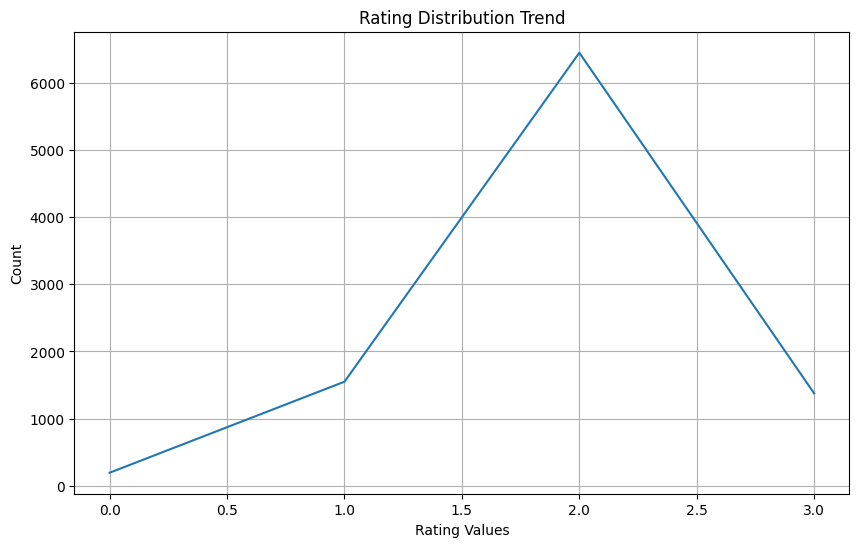

C:\Users\MSI\AppData\Local\Temp\ipykernel_23320\1421564841.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(df.groupby('rating')['runtime'].mean())


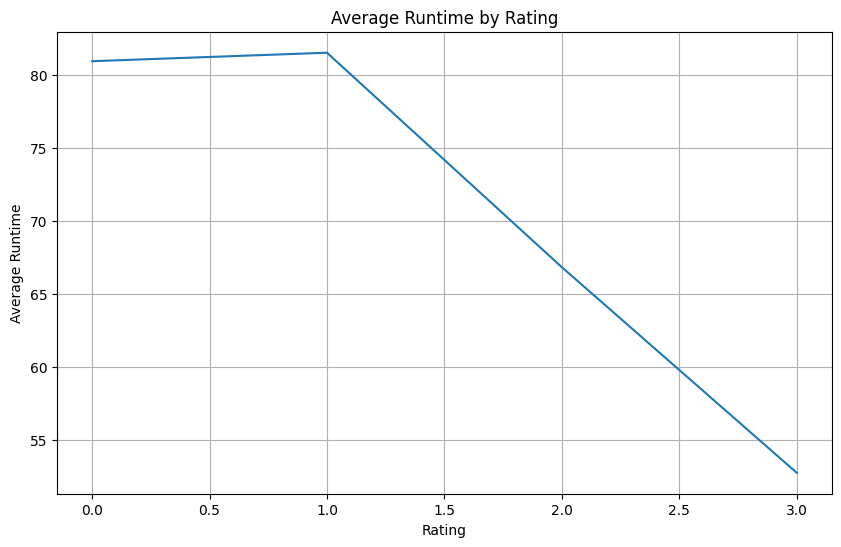

C:\Users\MSI\AppData\Local\Temp\ipykernel_23320\1421564841.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(df.groupby('rating')['votes'].mean())


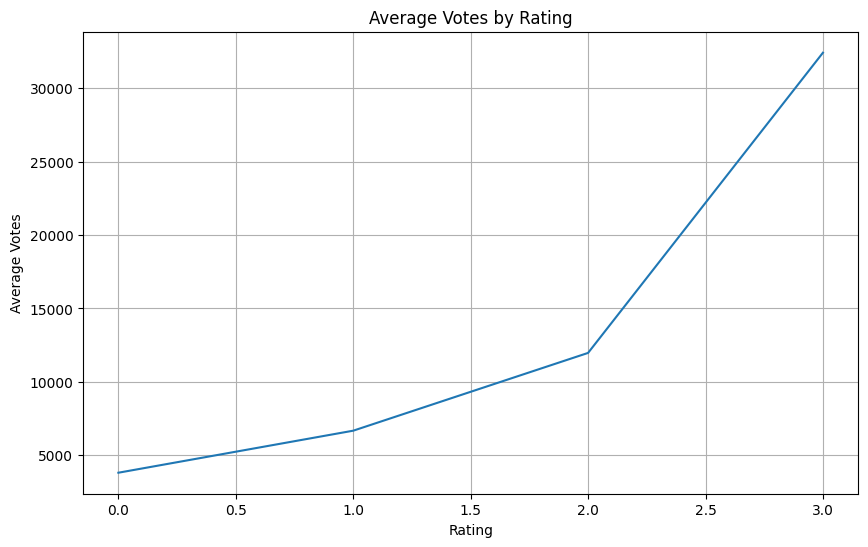

C:\Users\MSI\AppData\Local\Temp\ipykernel_23320\1421564841.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(df.groupby('rating')['votes'].mean(), label='Votes')
C:\Users\MSI\AppData\Local\Temp\ipykernel_23320\1421564841.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.plot(df.groupby('rating')['runtime'].mean(), label='Runtime')


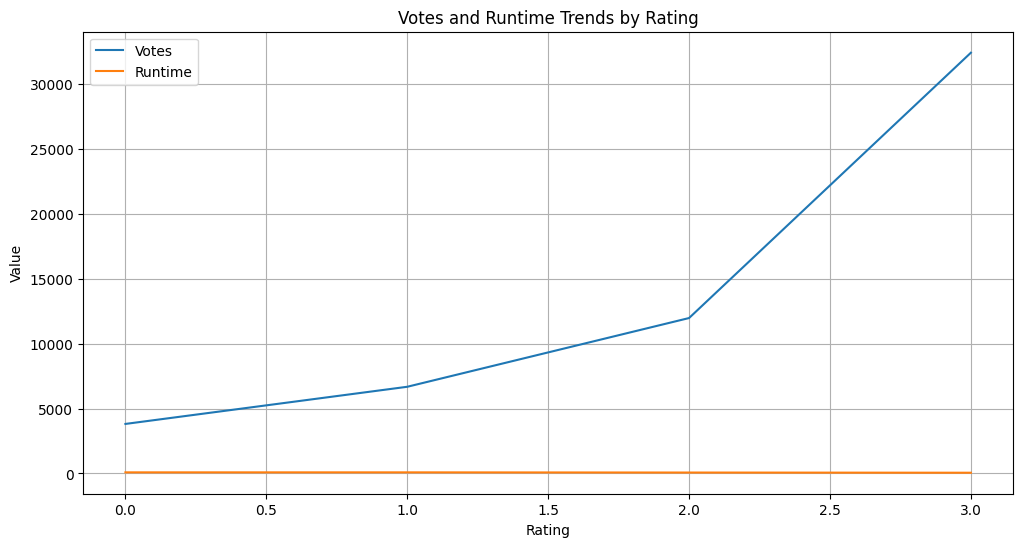

In [327]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

# Simple line plots

# 1. Rating trends
plt.figure(figsize=(10,6))
plt.plot(df['rating'].value_counts().sort_index())
plt.title('Rating Distribution Trend')
plt.xlabel('Rating Values')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 2. Runtime vs Rating trend
plt.figure(figsize=(10,6))
plt.plot(df.groupby('rating')['runtime'].mean())
plt.title('Average Runtime by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime')
plt.grid(True) 
plt.show()

# 3. Votes trend
plt.figure(figsize=(10,6))
plt.plot(df.groupby('rating')['votes'].mean())
plt.title('Average Votes by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Votes')
plt.grid(True)
plt.show()

# 4. Multiple trends comparison
plt.figure(figsize=(12,6))
plt.plot(df.groupby('rating')['votes'].mean(), label='Votes')
plt.plot(df.groupby('rating')['runtime'].mean(), label='Runtime')
plt.title('Votes and Runtime Trends by Rating')
plt.xlabel('Rating')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# **Stars Preprocessing**

In [328]:
print(df['stars'].head(10))

0    Director Peter Thorwarth Stars Peri Baumeister...
1    Stars Chris Wood, Sarah Michelle Gellar, Lena ...
2    Stars Andrew Lincoln, Norman Reedus, Melissa M...
3    Stars Justin Roiland, Chris Parnell, Spencer G...
4    Director Matthias Schweigh fer Stars Matthias ...
5    Stars Chase Stokes, Madelyn Cline, Madison Bai...
6    Director Augustine Frizzell Stars Shailene Woo...
7    Stars Michael C. Hall, Jennifer Carpenter, Dav...
8    Stars Maitreyi Ramakrishnan, Poorna Jagannatha...
9    Stars Alexandra Breckenridge, Martin Henderson...
Name: stars, dtype: object


**Column Stars divided into two columns : Director and Actors**

In [329]:
def extract_director_stars(row):
    text = str(row)

    # Extraire le director
    director = 'Not Specified'
    if 'Director' in text or 'DIRECTOR' in text or 'director' in text:
        # Gérer les différentes casses
        for dir_keyword in ['Director', 'DIRECTOR', 'director']:
            if dir_keyword in text:
                # Capturer le texte entre "Director" et "Stars" ou jusqu'à la fin
                director_part = text.split(dir_keyword)[-1].split('Stars')[0]
                director = director_part.strip()
                break

    # Extraire les stars
    stars = 'Not Specified'
    if 'Stars' in text or 'STARS' in text or 'stars' in text:
        for star_keyword in ['Stars', 'STARS', 'stars']:
            if star_keyword in text:
                stars = text.split(star_keyword)[-1].strip()
                break

    return pd.Series({'director': director, 'stars_only': stars})

# Créer les nouvelles colonnes
df[['director', 'stars_only']] = df['stars'].apply(extract_director_stars)

# Nettoyer les colonnes
df['director'] = df['director'].str.replace('...', '').str.strip()
df['stars_only'] = df['stars_only'].str.replace('...', '').str.strip()

# Afficher les résultats
print("Comparaison des 3 colonnes :")

print(df[['director', 'stars_only']].head(10))

#supprimer stars
df = df.drop(['stars'], axis=1)

Comparaison des 3 colonnes :
                director                                         stars_only
0        Peter Thorwarth  Peri Baumeister, Carl Anton Koch, Alexander Sc...
1          Not Specified  Chris Wood, Sarah Michelle Gellar, Lena Headey...
2          Not Specified  Andrew Lincoln, Norman Reedus, Melissa McBride...
3          Not Specified  Justin Roiland, Chris Parnell, Spencer Grammer...
4  Matthias Schweigh fer  Matthias Schweigh fer, Nathalie Emmanuel, Ruby...
5          Not Specified  Chase Stokes, Madelyn Cline, Madison Bailey, J...
6     Augustine Frizzell  Shailene Woodley, Joe Alwyn, Wendy Nottingham,...
7          Not Specified  Michael C. Hall, Jennifer Carpenter, David Zay...
8          Not Specified  Maitreyi Ramakrishnan, Poorna Jagannathan, Dar...
9          Not Specified  Alexandra Breckenridge, Martin Henderson, Coli...


**Visualisation du distributions des top 10 Realisateurs et Acteurs**

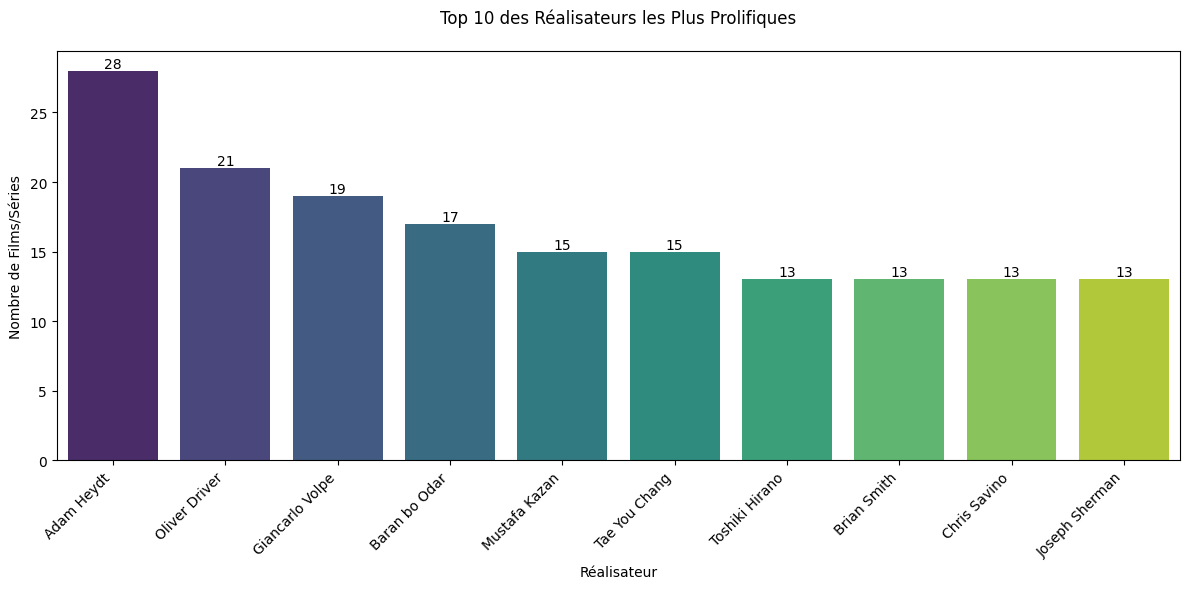

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenir le décompte des réalisateurs en excluant "Not Specified"
director_counts = df[df['director'] != 'Not Specified']['director'].value_counts()

# Prendre les top N réalisateurs
top_directors = director_counts.head(10)

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajout des titres et labels
plt.title('Top 10 des Réalisateurs les Plus Prolifiques', pad=20)
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de Films/Séries')

# Ajouter les valeurs sur chaque barre
for i, v in enumerate(top_directors.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


Top 20 des acteurs les plus présents dans la base:
stars_only
Mae Whitman              68
Jack De Sena             66
Zach Tyler               62
Emmanuel Esparza         61
Essined Aponte           61
Manuel Navarro           61
Masakazu Morita          59
lvaro Benet              58
Fumiko Orikasa           52
Michael C. Hall          52
Jennifer Carpenter       50
Ashleigh Ball            49
Julie Benz               48
Drew Barrymore           48
Karen Fukuhara           47
Abraham Rodriguez        41
Jasmeet Baduwalia        41
Jacqueline Scislowski    41
Rorrie D. Travis         41
James Arnold Taylor      41
Name: count, dtype: int64


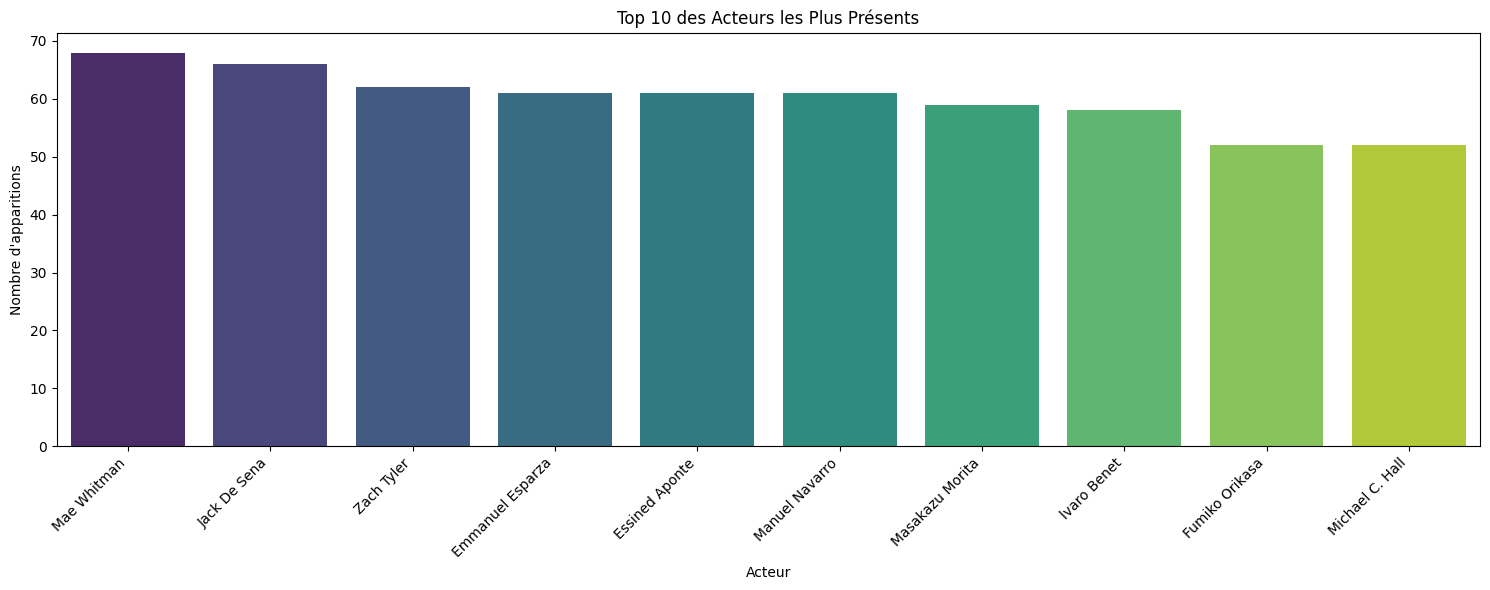


Statistiques sur les acteurs:
Nombre total d'acteurs uniques: 17097
Nombre moyen d'apparitions par acteur: 1.92


In [331]:
  # 1. Nettoyage de base de la colonne stars_only
df['stars_only'] = df['stars_only'].fillna('Not Specified')

# 2. Création d'une liste de tous les acteurs (en splitant la colonne stars_only)
all_actors = df['stars_only'].str.split(',').explode().str.strip()
actor_counts = all_actors[all_actors != 'Not Specified'].value_counts()

# 3. Affichage des résultats
print("Top 20 des acteurs les plus présents dans la base:")
print(actor_counts.head(20))

# 4. Visualisation
plt.figure(figsize=(15, 6))
top_actors = actor_counts.head(10)  # On prend les 10 premiers pour la lisibilité

# Création du graphique à barres
sns.barplot(x=top_actors.index,
            y=top_actors.values,
            palette='viridis')

plt.title('Top 10 des Acteurs les Plus Présents')
plt.xlabel('Acteur')
plt.ylabel('Nombre d\'apparitions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Statistiques supplémentaires
print("\nStatistiques sur les acteurs:")
print(f"Nombre total d'acteurs uniques: {len(actor_counts)}")
print(f"Nombre moyen d'apparitions par acteur: {actor_counts.mean():.2f}")


In [332]:
df.head(3)

,movies,year,genre,rating,one-line,votes,runtime,gross,year_start,year_end,content_type,movie_duration,duration_category,director,stars_only
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,"action,horror,thriller",2,A woman with a mysterious illness is forced in...,21062.0,121.0,6.145,2021,2021,0,1,4,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,"action,adventure,animation",1,The war for Eternia begins again in what may b...,17870.0,25.0,6.145,2021,2021,0,1,0,Not Specified,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,"drama,horror,thriller",3,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,6.145,2010,2022,0,13,1,Not Specified,"Andrew Lincoln, Norman Reedus, Melissa McBride..."


**Genre Encoding get_dummies() :**

In [333]:
def codage_genre(df):
    import pandas as pd
    # 2. Séparer les genres en colonnes binaires
    genres = df['genre'].str.get_dummies(sep=',')  # Séparer par virgule et créer des colonnes binaires
    # 3. Joindre les nouvelles colonnes au DataFrame
    df = pd.concat([df, genres], axis=1)
    # 4. Supprimer la colonne 'genre' originale après encodage
    df.drop(['genre'], axis=1, inplace=True)
    return df
# Appliquer la fonction
df =codage_genre(df)


In [281]:
df.head(3)

,movies,year,rating,one-line,votes,runtime,gross,year_start,year_end,content_type,...,reality tv,romance,sci fi,short,sport,talk show,thriller,unspecified,war,western
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,2,A woman with a mysterious illness is forced in...,21062.0,121.0,6.145,2021,2021,0,...,0,0,0,0,0,0,1,0,0,0
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,1,The war for Eternia begins again in what may b...,17870.0,25.0,6.145,2021,2021,0,...,0,0,0,0,0,0,0,0,0,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,3,Sheriff Deputy Rick Grimes wakes up from a com...,885805.0,44.0,6.145,2010,2022,0,...,0,0,0,0,0,0,1,0,0,0


**One-line Encoding with Sentence Transformers:**

In [336]:
def create_oneline_embeddings(df):
  from sentence_transformers import SentenceTransformer
  import pandas as pd
  import numpy as np  
  try:          
      # Initialize model
      model = SentenceTransformer('all-MiniLM-L6-v2')
      
      # Create embeddings
      df['one-line'] = model.encode(df['one-line'].tolist(), show_progress_bar=True).tolist()
      
      # Convert string embeddings to numpy arrays if needed
      if isinstance(df['one-line'].iloc[0], str):
          df['one-line'] = df['one-line'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
      
      return df
      
  except Exception as e:
      print(f"An error occurred in one-line embedding: {str(e)}")
      return None

In [338]:
df = create_oneline_embeddings(df)

Batches:   0%|          | 0/299 [00:00<?, ?it/s]

**Director Encoding with Sentence Transformers**

In [339]:
def create_director_embeddings(df):
  from sentence_transformers import SentenceTransformer
  import pandas as pd
  import numpy as np  
  try:          
      # Initialize model
      model = SentenceTransformer('all-MiniLM-L6-v2')
      
      # Create embeddings
      df['director'] = model.encode(df['director'].tolist(), show_progress_bar=True).tolist()
      
      # Convert string embeddings to numpy arrays if needed
      if isinstance(df['director'].iloc[0], str):
          df['director'] = df['director'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
      
      return df 
  except Exception as e:
      print(f"An error occurred in director embedding: {str(e)}")
      return None

In [340]:
df=create_director_embeddings(df)

Batches:   0%|          | 0/299 [00:00<?, ?it/s]

In [341]:
df.head()

,movies,year,rating,one-line,votes,runtime,gross,year_start,year_end,content_type,...,reality tv,romance,sci fi,short,sport,talk show,thriller,unspecified,war,western
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,2,"[0.010676323436200619, -0.01394718885421753, -...",21062.000000,121.0,6.145,2021,2021,0,...,0,0,0,0,0,0,1,0,0,0
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,1,"[-0.07542672753334045, -0.01596166007220745, -...",17870.000000,25.0,6.145,2021,2021,0,...,0,0,0,0,0,0,0,0,0,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,3,"[-0.022518804296851158, -0.012194007635116577,...",885805.000000,44.0,6.145,2010,2022,0,...,0,0,0,0,0,0,1,0,0,0
3,"[-0.12033625692129135, -0.02028549462556839, -...",2013,3,"[-0.07534991949796677, 0.053644951432943344, -...",414849.000000,23.0,6.145,2013,2013,0,...,0,0,0,0,0,0,0,0,0,0
4,"[-0.16527359187602997, 0.007843196392059326, -...",2021,2,"[-0.11667746305465698, 0.05727919936180115, -0...",69048.417753,148.0,6.145,2021,2021,0,...,0,0,0,0,0,0,0,0,0,0


**Stars_Only Encoding with Sentence Transformers**

In [343]:
def create_stars_embeddings(df):
   from sentence_transformers import SentenceTransformer
   import pandas as pd
   import numpy as np  
   try:          
       # Initialize model
       model = SentenceTransformer('all-MiniLM-L6-v2')
       
       # Create embeddings 
       df['stars_only'] = model.encode(df['stars_only'].tolist(), show_progress_bar=True).tolist()
       
       # Convert string embeddings to numpy arrays if needed
       if isinstance(df['stars_only'].iloc[0], str):
           df['stars_only'] = df['stars_only'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
       
       return df
       
   except Exception as e:
       print(f"An error occurred in stars embedding: {str(e)}")
       return None

# Call the function
df = create_stars_embeddings(df)

Batches:   0%|          | 0/299 [00:00<?, ?it/s]

In [344]:
df.drop(['year_start', 'year_end','runtime','year'], axis=1, inplace=True)

In [345]:
Secour2=df.copy

# **Reste Machine Learning**

Before Preprocessing

In [346]:
df_secours.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


After Pre Processing

In [347]:
df.head(5)

,movies,year,rating,one-line,votes,gross,content_type,movie_duration,duration_category,director,...,reality tv,romance,sci fi,short,sport,talk show,thriller,unspecified,war,western
0,"[-0.013224651105701923, -0.031249316409230232,...",2021,2,"[0.010676323436200619, -0.01394718885421753, -...",21062.000000,6.145,0,1,4,"[0.03192050755023956, 0.05524196848273277, -0....",...,0,0,0,0,0,0,1,0,0,0
1,"[-0.04141589626669884, 0.026655057445168495, 0...",2021,1,"[-0.07542672753334045, -0.01596166007220745, -...",17870.000000,6.145,0,1,0,"[-0.022470921277999878, -0.03966304287314415, ...",...,0,0,0,0,0,0,0,0,0,0
2,"[-0.051055245101451874, -0.03851728513836861, ...",2010 2022,3,"[-0.022518804296851158, -0.012194007635116577,...",885805.000000,6.145,0,13,1,"[-0.022470921277999878, -0.03966304287314415, ...",...,0,0,0,0,0,0,1,0,0,0
3,"[-0.12033625692129135, -0.02028549462556839, -...",2013,3,"[-0.07534991949796677, 0.053644951432943344, -...",414849.000000,6.145,0,1,0,"[-0.022470921277999878, -0.03966304287314415, ...",...,0,0,0,0,0,0,0,0,0,0
4,"[-0.16527359187602997, 0.007843196392059326, -...",2021,2,"[-0.11667746305465698, 0.05727919936180115, -0...",69048.417753,6.145,0,1,4,"[-0.05092998594045639, 0.08504820615053177, -0...",...,0,0,0,0,0,0,0,0,0,0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   movies             9568 non-null   object  
 1   year               9026 non-null   object  
 2   rating             9568 non-null   category
 3   one-line           9568 non-null   object  
 4   votes              9568 non-null   float64 
 5   gross              9568 non-null   float64 
 6   content_type       9568 non-null   int64   
 7   movie_duration     9568 non-null   Int64   
 8   duration_category  9568 non-null   category
 9   director           9568 non-null   object  
 10  stars_only         9568 non-null   object  
 11  action             9568 non-null   int64   
 12  adventure          9568 non-null   int64   
 13  animation          9568 non-null   int64   
 14  biography          9568 non-null   int64   
 15  comedy             9568 non-null   int64   
 16  crime 

In [351]:
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
movies               0
rating               0
one-line             0
votes                0
gross                0
content_type         0
movie_duration       0
duration_category    0
director             0
stars_only           0
action               0
adventure            0
animation            0
biography            0
comedy               0
crime                0
documentary          0
drama                0
family               0
fantasy              0
film noir            0
game show            0
history              0
horror               0
music                0
musical              0
mystery              0
news                 0
reality tv           0
romance              0
sci fi               0
short                0
sport                0
talk show            0
thriller             0
unspecified          0
war                  0
western              0
dtype: int64


# DF preparated for training

In [352]:
def prepare_df_for_training(df):
    df_prepared = df.copy()
    
    for column in df_prepared.columns:
        # Check if column contains lists/arrays
        if isinstance(df_prepared[column].iloc[0], (list, np.ndarray)):
            # Convert each array to its mean value
            df_prepared[column] = df_prepared[column].apply(lambda x: np.mean(x))
                
    return df_prepared

In [353]:
df =prepare_df_for_training(df)

In [354]:
df.head(4)

,movies,rating,one-line,votes,gross,content_type,movie_duration,duration_category,director,stars_only,...,reality tv,romance,sci fi,short,sport,talk show,thriller,unspecified,war,western
0,0.001069,2,-0.000331,21062.0,6.145,0,1,4,0.000417,0.000245,...,0,0,0,0,0,0,1,0,0,0
1,0.000648,1,0.000480,17870.0,6.145,0,1,0,0.001265,0.000796,...,0,0,0,0,0,0,0,0,0,0
2,0.001268,3,-0.000634,885805.0,6.145,0,13,1,0.001265,0.000504,...,0,0,0,0,0,0,1,0,0,0
3,0.000467,3,0.000118,414849.0,6.145,0,1,0,0.001265,0.000922,...,0,0,0,0,0,0,0,0,0,0


**Sentence Transformers** embeddings typically have values between -1 and 1 because they are normalized.
Specifically for the 'all-MiniLM-L6-v2' model:

Minimum: -1

Maximum: 1

Values are centered around 0

Scale is normalized using cosine normalization

This normalization allows for:

Better comparison between different embeddings

Numerical stability in calculations

Consistent scale regardless of input text

More reliable similarity computations

# Splitting the data-set into Training and Test Set

In any Machine Learning model is that we’re going to split data-set into two separate sets





1. Training Set
2. Test Set
Why we need splitting ?





Well here it’s your algorithm model that is going to learn from your data to make predictions. Generally we split the data-set into 70:30 ratio or 80:20 what does it mean, 80 percent data take in train and 20 percent data take in test. However, this Splitting can be varies according to the data-set shape and size.

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('rating', axis=1),  # Toutes les colonnes sauf 'rating'
    df['rating'],               # Variable cible
    test_size=0.2,             # 80% training, 20% test
    random_state=42            # Pour reproductibilité
)


Training Logistic Regression...


c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.692
Precision: 0.570
Recall: 0.692
F1-score: 0.579

Training Ridge Classifier...
Accuracy: 0.691
Precision: 0.637
Recall: 0.691
F1-score: 0.595

Training SGD Classifier...
Accuracy: 0.171
Precision: 0.416
Recall: 0.171
F1-score: 0.067

Training LDA...
Accuracy: 0.689
Precision: 0.655
Recall: 0.689
F1-score: 0.636

Training Random Forest...
Accuracy: 0.760
Precision: 0.741
Recall: 0.760
F1-score: 0.735

Training SVM...


c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.687
Precision: 0.605
Recall: 0.687
F1-score: 0.561

Training Neural Network...


c:\Users\MSI\anaconda3\envs\mlops-new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.699
Precision: 0.673
Recall: 0.699
F1-score: 0.604


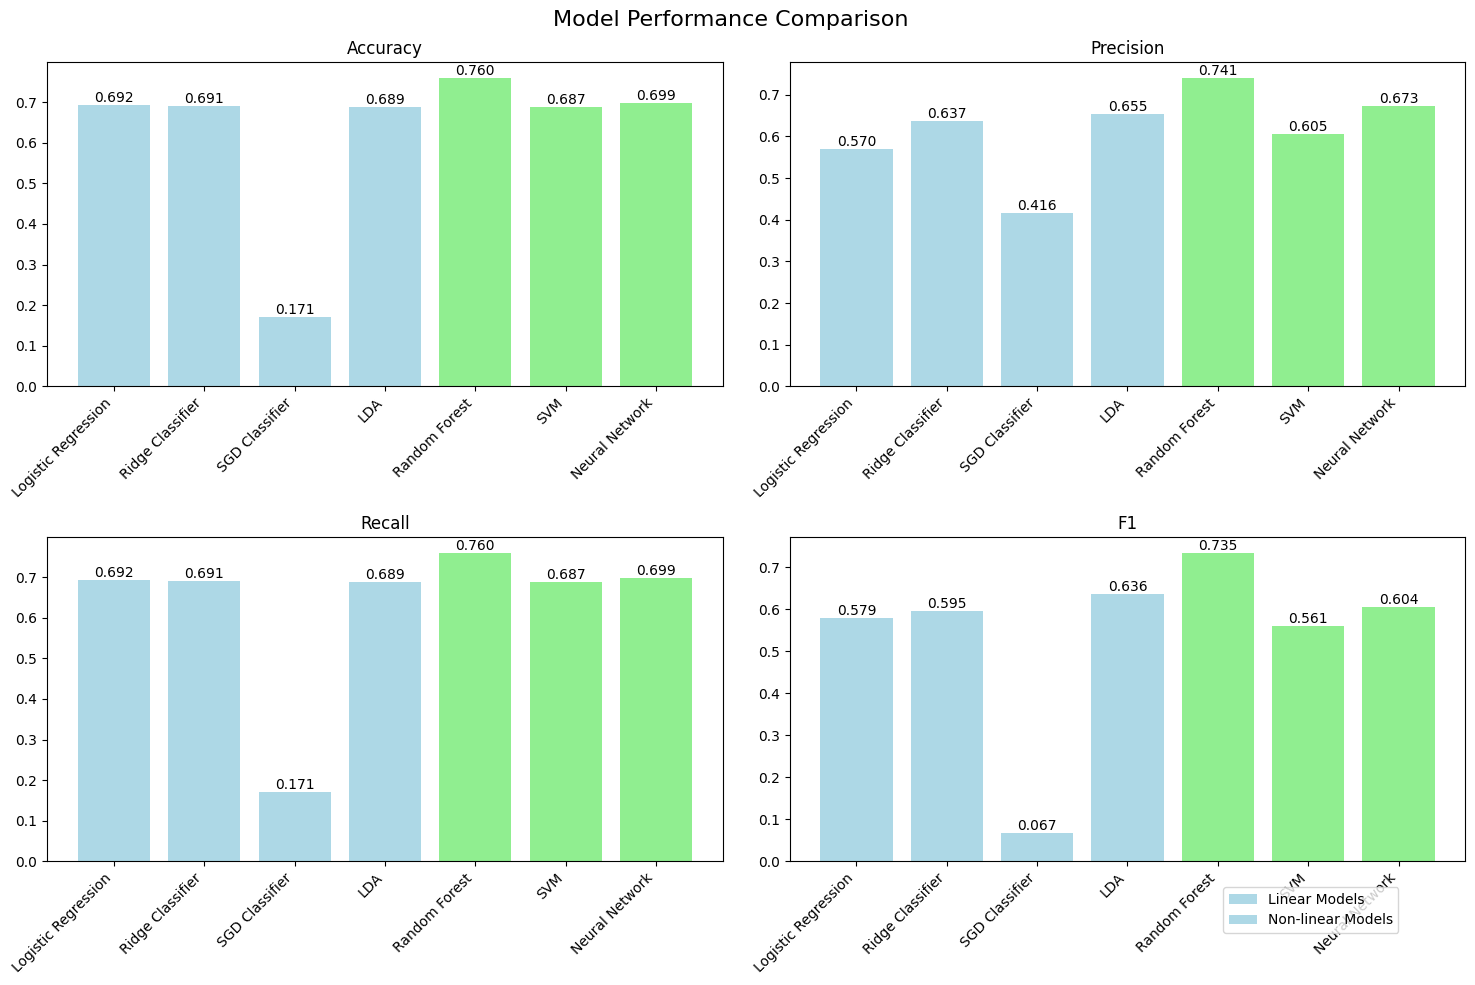

In [360]:
# Required imports
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Linear Algorithms
def train_linear_models(X_train, X_test, y_train, y_test):
    linear_models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Ridge Classifier': RidgeClassifier(random_state=42),
        'SGD Classifier': SGDClassifier(max_iter=1000, random_state=42),
        'LDA': LinearDiscriminantAnalysis()
    }

    linear_results = {}

    for name, model in linear_models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        linear_results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1-score: {f1:.3f}")

    return linear_results

# Part 2: Non-Linear Algorithms
def train_nonlinear_models(X_train, X_test, y_train, y_test):
    nonlinear_models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
    }

    nonlinear_results = {}

    for name, model in nonlinear_models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

        nonlinear_results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"F1-score: {f1:.3f}")

    return nonlinear_results

# Part 3: Comparative Visualization
def plot_comparison(linear_results, nonlinear_results):
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    
    models = list(linear_results.keys()) + list(nonlinear_results.keys())
    metric_values = {metric: [] for metric in metrics}

    for metric in metrics:
        for result in linear_results.values():
            metric_values[metric].append(result[metric])
        for result in nonlinear_results.values():
            metric_values[metric].append(result[metric])

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16)

    colors = ['lightblue'] * len(linear_results) + ['lightgreen'] * len(nonlinear_results)

    for (metric, values), ax in zip(metric_values.items(), axes.ravel()):
        bars = ax.bar(range(len(models)), values, color=colors)
        ax.set_title(f'{metric.capitalize()}')
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=45, ha='right')

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom')

    fig.legend(['Linear Models', 'Non-linear Models'],
              loc='lower right', bbox_to_anchor=(0.95, 0.05))

    plt.tight_layout()
    plt.show()

# Use the functions:
# Train models
linear_results = train_linear_models(X_train, X_test, y_train, y_test)
nonlinear_results = train_nonlinear_models(X_train, X_test, y_train, y_test)

# Plot comparison
plot_comparison(linear_results, nonlinear_results)

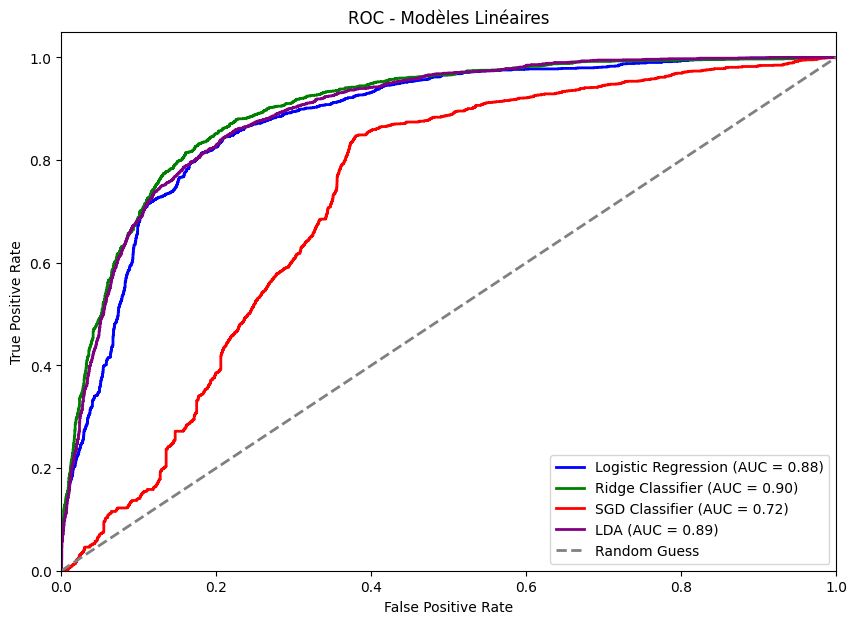

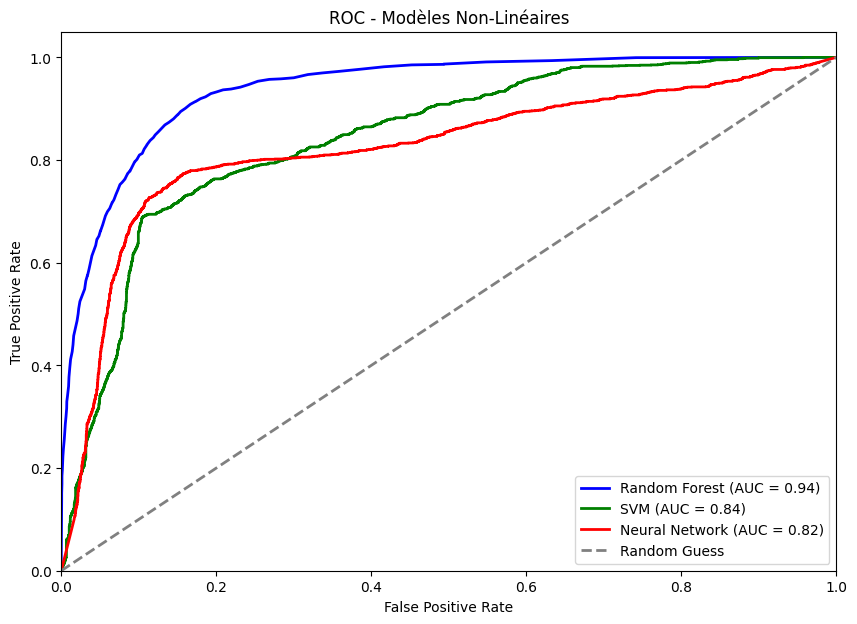

In [364]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fonction pour tracer UNE seule courbe ROC par modèle
def plot_single_roc_curve(results, X_test, y_test, class_labels, title):
    y_test_bin = label_binarize(y_test, classes=class_labels)
    n_classes = len(class_labels)

    plt.figure(figsize=(10, 7))
    colors = cycle(['blue', 'green', 'red', 'purple', 'orange', 'brown'])

    for (name, result), color in zip(results.items(), colors):
        model = result['model']

        # Prédictions en probabilité ou en score
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)
            if n_classes == 2:
                y_score = np.vstack([1 - y_score, y_score]).T

        # Calcul de la micro-average ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)

        # Tracer la courbe ROC pour chaque modèle
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')

    # Courbe aléatoire
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guess')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Appel pour les modèles linéaires
plot_single_roc_curve(linear_results, X_test, y_test, class_labels, title="ROC - Modèles Linéaires")

# Appel pour les modèles non linéaires
plot_single_roc_curve(nonlinear_results, X_test, y_test, class_labels, title="ROC - Modèles Non-Linéaires")
